In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [5]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [6]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [7]:
cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [8]:
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 46s 97ms/step - loss: 0.2409 - accuracy: 0.9263 - val_loss: 0.0504 - val_accuracy: 0.9840
Epoch 2/30
469/469 [==============================] - 49s 105ms/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 3/30
469/469 [==============================] - 51s 108ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0363 - val_accuracy: 0.9869
Epoch 4/30
469/469 [==============================] - 49s 105ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 5/30
469/469 [==============================] - 45s 96ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 6/30
469/469 [==============================] - 49s 104ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 7/30
469/469 [==============================] - 50s 107ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0326 - val_accu

In [9]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9934


[0.036220189183950424, 0.993399977684021]

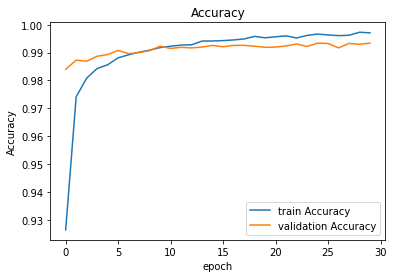

In [10]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')

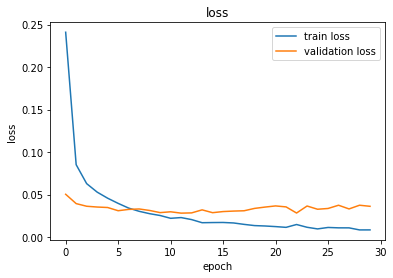

In [11]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')